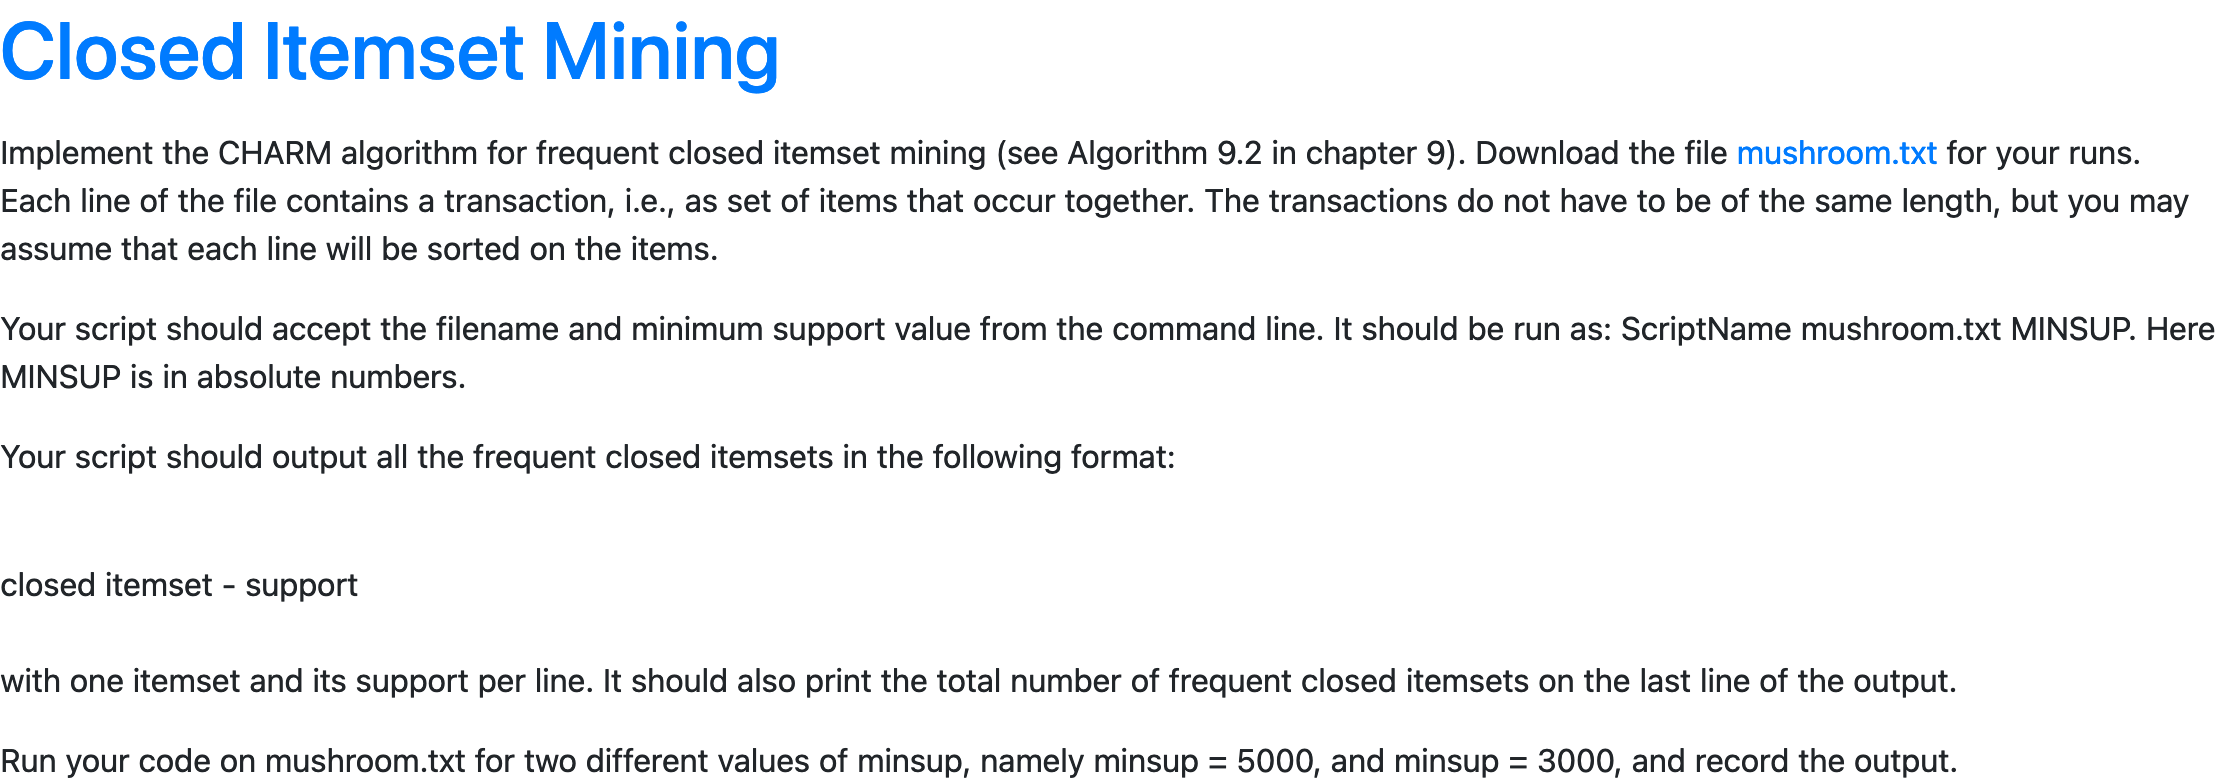

In [1]:
import numpy as np
from collections import defaultdict

In [2]:
def closed_itemset(minsup, file_path='data/mushroom.txt'):
    class ItemsetTID:
        def __init__(self, itemset=None, tid=None):
            self.itemset = itemset if itemset is not None else set()
            self.tid = tid if tid is not None else set()
        def __repr__(self):
            return f'Itemset: {sorted(self.itemset)}, Support: {len(self.tid)}'

    # read file
    with open(file_path, 'r') as f:
        lines = f.read().splitlines()
        transactions = [set(map(int, line.split())) for line in lines]

    def charm(P, minsup, closed_itemsets):
        """
        Recursive CHARM algorithm
        """
        P = sorted(P, key=lambda x: len(x.tid))  # sort P by increasing support (|t(X_i)|)
        for i in range(len(P)):
            P_i = []
            X_i, t_Xi = P[i].itemset, P[i].tid
            for j in range(i + 1, len(P)):
                X_j, t_Xj = P[j].itemset, P[j].tid
                X_ij = X_i.union(X_j)
                t_Xij = t_Xi.intersection(t_Xj)
                
                if len(t_Xij) >= minsup:
                    if t_Xi == t_Xj:  # property 1
                        P[i].itemset = X_ij
                    elif t_Xi.issubset(t_Xj):  # property 2
                        P[i].itemset = X_ij
                    else:  # property 3
                        P_i.append(ItemsetTID(X_ij, t_Xij))
            
            if P_i:
                charm(P_i, minsup, closed_itemsets)
            
            # check if Xi should be added to the closed set
            is_closed = True
            for Z in closed_itemsets:
                if X_i.issubset(Z.itemset) and t_Xi == Z.tid:
                    is_closed = False
                    break
            if is_closed:
                closed_itemsets.append(P[i])

    item_tid_map = defaultdict(set)

    for tid, transaction in enumerate(transactions):
        for item in transaction:
            item_tid_map[item].add(tid)

    initial_itemsets = [ItemsetTID({item}, tids) for item, tids in item_tid_map.items() if len(tids) >= minsup]
    
    closed_itemsets = []
    charm(initial_itemsets, minsup, closed_itemsets)
    
    print('Frequent closed itemsets:')
    for itemset in closed_itemsets:
        print(f'{sorted(itemset.itemset)} - {len(itemset.tid)}')
    print(f'Total number of closed itemsets: {len(closed_itemsets)}')

In [3]:
closed_itemset(3000)

Frequent closed itemsets:
[34, 90, 116] - 3104
[34, 116] - 3130
[85, 116] - 3148
[6, 90] - 3020
[6, 34, 86] - 3096
[6, 34] - 3098
[6, 86] - 3102
[6, 85] - 3152
[10, 36, 86, 90] - 3016
[10, 86, 90] - 3044
[10, 34, 90] - 3052
[10, 34, 36] - 3190
[10, 36, 86] - 3208
[10, 34, 86] - 3218
[10, 34] - 3226
[10, 86] - 3236
[10, 85] - 3244
[23, 36, 39] - 3016
[23, 63] - 3040
[23, 90, 93] - 3080
[23, 59, 93] - 3040
[23, 36, 93] - 3080
[23, 93] - 3184
[23, 36, 59] - 3128
[23, 59] - 3232
[23, 36] - 3272
[23, 85] - 3376
[36, 52] - 3068
[34, 52, 86] - 3298
[34, 52] - 3306
[52, 86] - 3316
[52, 85] - 3516
[2, 28, 39, 86] - 3024
[28, 34, 39, 86] - 3096
[2, 28, 34, 39] - 3024
[2, 28, 39] - 3216
[28, 39] - 3288
[2, 28, 86] - 3216
[28, 34, 86] - 3328
[2, 28, 34] - 3216
[28, 34] - 3336
[2, 28] - 3408
[28, 85] - 3528
[3, 36] - 3016
[3, 34, 86, 90] - 3416
[3, 90] - 3464
[3, 34, 86] - 3602
[3, 86] - 3608
[3, 85] - 3656
[39, 56, 90] - 3312
[36, 39, 56] - 3432
[36, 56, 90] - 3408
[36, 56] - 3528
[56, 90] - 3656


In [4]:
closed_itemset(5000)

Frequent closed itemsets:
[59, 85] - 5176
[34, 39, 86] - 5402
[39, 86] - 5420
[39, 85] - 5612
[34, 36, 86, 90] - 6272
[36, 90] - 6464
[34, 36, 86] - 6602
[36, 86] - 6620
[36, 85] - 6812
[34, 86, 90] - 7288
[34, 90] - 7296
[85, 90] - 7488
[34, 86] - 7906
[34, 85] - 7914
[85, 86] - 7924
[85] - 8124
Total number of closed itemsets: 16


### Let try the example in the book

In [5]:
closed_itemset(3, 'data/test.txt')

Frequent closed itemsets:
[1, 4] - 3
[1, 2] - 4
[4, 5] - 3
[2, 4] - 4
[3, 5] - 3
[2, 3] - 4
[2, 5] - 5
[2] - 6
Total number of closed itemsets: 8
